# Technology Sector vs. S&P 500 Benchmark Analysis

Date: April 24, 2024 <br>
Creator: Reese Oliver <br>
Source: Yahoo Finance

### In this project, we're going to analyze the strengths and weaknesses of two major index funds:

1. The **iShares U.S. Technology ETF (IYW)** from **BlackRock, Inc**. This technology ETF provides broad exposure to the technology sector, which helps to diverisfy investors and shield against risk. BlackRock is the largest asset management company in the world, with over 9 trillion dollars in assets under management. <br>
<br>
2. **Standard and Poor's 500 (SPX)**, which is referred to as the **S&P 500 Index**. This index is one of the most popular indices in the world, and it comprises the shares of the largest 500 publicly traded companies in America with the highest values of market capitalisation. Because the S&P 500 tracks the price of large-cap US equities, it is considered a proxy for showing the health of the stockmarket and US economy.

# Initial Exploration for Blackrock's ETF

First, we'll begin by importing all of the standard data analysis libraries, and after that, we'll run the magic command that allows us to display data visualizations inside of Jupyter Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import mplcursors as mpl
%matplotlib inline

Let's begin by reading the datasets into our notebook. We'll start by reading The iShares U.S. Technology ETF (IYW) from BlackRock, Inc into a pandas DataFrame.

In [2]:
iyw = pd.read_csv('blackrock_iyw_tech.csv')

In [3]:
iyw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-05-19,27.765625,27.765625,27.437500,27.437500,23.689451,80000
1,2000-05-22,26.500000,26.500000,26.500000,26.500000,22.880022,400
2,2000-05-23,27.312500,27.312500,27.000000,27.093750,23.392653,104000
3,2000-05-24,25.734375,26.812500,24.875000,26.812500,23.149824,96400
4,2000-05-25,27.593750,27.617188,26.437500,26.437500,22.826054,64800
...,...,...,...,...,...,...,...
6015,2024-04-18,129.520004,130.070007,128.229996,128.410004,128.410004,1468800
6016,2024-04-19,127.790001,128.190002,124.320000,124.750000,124.750000,2094300
6017,2024-04-22,125.800003,127.070000,124.559998,126.239998,126.239998,1832600
6018,2024-04-23,127.080002,128.820007,126.849998,128.520004,128.520004,1326900


The dataset contains 6020 rows, with daily entries from May, 19, 2000 to the present date of April 24, 2024. Next, we'll run the `dataframe.info()` function to explore the dataset further. Our goal right now is to find out if there are any columns that need data cleaning.

In [4]:
iyw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6020 entries, 0 to 6019
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6020 non-null   object 
 1   Open       6020 non-null   float64
 2   High       6020 non-null   float64
 3   Low        6020 non-null   float64
 4   Close      6020 non-null   float64
 5   Adj Close  6020 non-null   float64
 6   Volume     6020 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.3+ KB


It appears that all the columns have uniform length and uniform data type. Let's explore further to see if we can find any columns that need cleaning in this dataset.

# Cleaning Phase for Blackrock's ETF

The first thing we'll want to do is convert the `Date` column into the `datetime` datatype by using `pd.to_datetime()`. It's important to convert your date columns to the `datetime` datatype because this datatype is more compatible with Pandas and Matplotlib. The datetime datatype ensures that dates are consistently formatted throughout the dataset, which is essential for accurate comparisons, calculations, and visualizations.

After that, we'll run `Series.value_counts()` on each column to see the counts of unique values in each column. Inside of `Series.value_counts()`, we'll set the `dropna` parameter to `False`, and by doing this, we'll be able to include NaN (Not a Number) values in our counts, which allows us to see how many missing values are present in each column.

In [5]:
iyw['Date'] = pd.to_datetime(iyw['Date'])
iyw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6020 entries, 0 to 6019
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6020 non-null   datetime64[ns]
 1   Open       6020 non-null   float64       
 2   High       6020 non-null   float64       
 3   Low        6020 non-null   float64       
 4   Close      6020 non-null   float64       
 5   Adj Close  6020 non-null   float64       
 6   Volume     6020 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 329.3 KB


In [6]:
columns = iyw.columns

for c in columns:
    print("Column Name:", iyw[c].value_counts())

Column Name: Date
2000-05-19    1
2016-04-29    1
2016-05-12    1
2016-05-11    1
2016-05-10    1
             ..
2008-05-12    1
2008-05-09    1
2008-05-08    1
2008-05-07    1
2024-04-24    1
Name: count, Length: 6020, dtype: int64
Column Name: Open
12.212500     8
11.662500     8
12.250000     8
11.650000     8
11.387500     7
             ..
17.680000     1
17.865000     1
17.857500     1
18.389999     1
129.860001    1
Name: count, Length: 4638, dtype: int64
Column Name: High
14.475000     7
12.275000     6
13.740000     6
12.000000     6
12.997500     6
             ..
16.420000     1
16.475000     1
16.580000     1
16.545000     1
130.169998    1
Name: count, Length: 4810, dtype: int64
Column Name: Low
11.687500     7
25.312500     6
13.700000     6
11.587500     5
11.470000     5
             ..
17.032499     1
17.172501     1
17.387501     1
17.482500     1
128.149994    1
Name: count, Length: 4770, dtype: int64
Column Name: Close
11.650000     7
11.750000     7
12.200000     

Besides the `Date` column, there doesn't appear to be any non-number entries, so our calculations will not be thrown off. This dataset is already very clean, so we won't have to filter it and instead we can skip right to creating data visualizations. In the code below, we'll create some preliminary visualizations.

Text(0, 0.5, 'Closing Price')

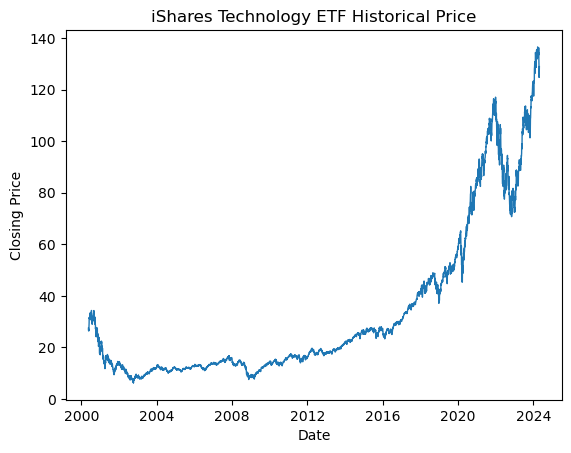

In [7]:
plt.plot(iyw['Date'],iyw['Close'], linewidth=1)
plt.title('iShares Technology ETF Historical Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')

The span of time for this line plot is very large, so let's try focusing on smaller sections of time. In the next two visualizations, we'll focus on 2007-2009, which will show us the Great Recession. After that, we can focus on 2020-2023 to show the performance during the COVID pandemic.

In [8]:
iyw_recession = iyw[iyw['Date'].between(pd.to_datetime('2006-01-01'),pd.to_datetime('2010-01-01'))]
iyw_recession

,Date,Open,High,Low,Close,Adj Close,Volume
1412,2006-01-03,12.4950,12.7450,12.3975,12.6975,11.139487,1222800
1413,2006-01-04,12.7450,12.8750,12.7450,12.8650,11.286431,314400
1414,2006-01-05,12.9000,12.9975,12.8925,12.9975,11.402675,640800
1415,2006-01-06,13.1075,13.2300,13.0300,13.2150,11.593489,1303200
1416,2006-01-09,13.2100,13.3100,13.1650,13.2575,11.630775,456000
...,...,...,...,...,...,...,...
2414,2009-12-24,14.3500,14.4750,14.3375,14.4700,12.912599,1376000
2415,2009-12-28,14.5075,14.5425,14.4150,14.4875,12.928216,1486800
2416,2009-12-29,14.5125,14.5150,14.4450,14.4600,12.903677,954800
2417,2009-12-30,14.4450,14.5325,14.4275,14.5325,12.968369,788000


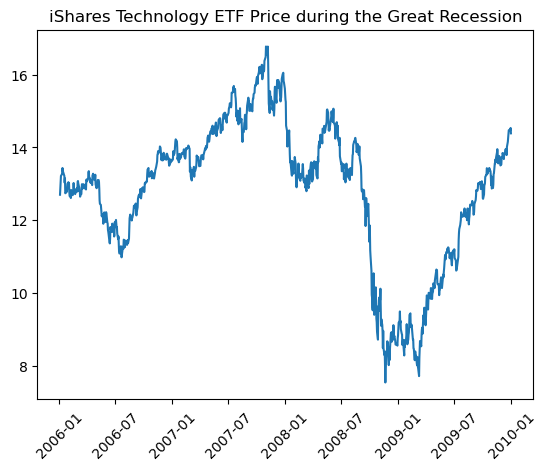

In [9]:
plt.plot(iyw_recession['Date'],iyw_recession['Close'])
plt.title('iShares Technology ETF Price during the Great Recession')
plt.xticks(rotation=45)
plt.show()

In [10]:
iyw_covid = iyw[iyw['Date'].between(pd.to_datetime('2019-08-01'),pd.to_datetime('2024-03-24'))]
iyw_covid

,Date,Open,High,Low,Close,Adj Close,Volume
4829,2019-08-01,51.810001,52.869999,51.180000,51.427502,50.166836,502800
4830,2019-08-02,50.970001,51.020000,50.167500,50.439999,49.203545,544000
4831,2019-08-05,49.167500,49.167500,48.012501,48.424999,47.237946,1787600
4832,2019-08-06,49.007500,49.355000,48.610001,49.107498,47.903709,491200
4833,2019-08-07,48.577499,49.430000,48.305000,49.342499,48.132942,1181200
...,...,...,...,...,...,...,...
5993,2024-03-18,134.110001,135.100006,133.330002,133.529999,133.452347,1448900
5994,2024-03-19,132.720001,134.289993,131.759995,134.139999,134.061996,1315100
5995,2024-03-20,134.440002,135.860001,133.809998,135.850006,135.771011,552800
5996,2024-03-21,137.479996,137.539993,135.919998,136.139999,136.139999,666100


(array([17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

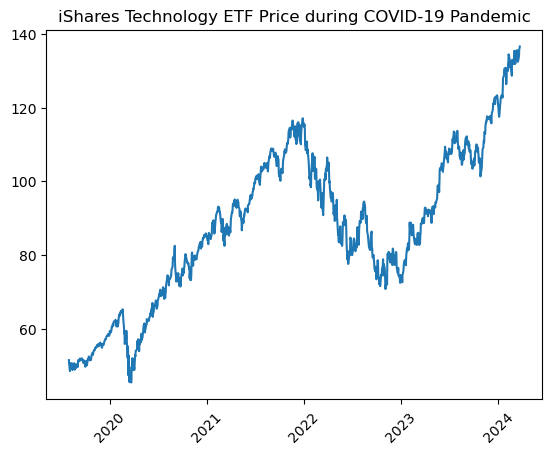

In [11]:
plt.plot(iyw_covid['Date'], iyw_covid['Close'])
plt.title('iShares Technology ETF Price during COVID-19 Pandemic')
plt.xticks(rotation=45)

If we look at the shape of the line on each of these three visuals, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: they are the visual representation of the daily variation in the stock price. The price goes up and down, up and down again, day to day. The price only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to show only the long-term trends, we can use the rolling mean (also known as the moving average).

In the code below, we'll use a rolling 30 day average to see the longer term trends for the iShares ETF.

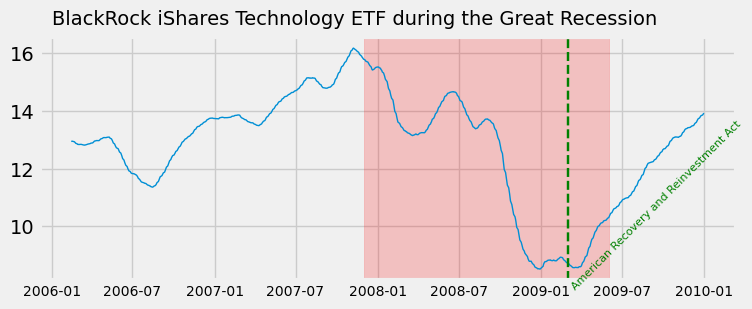

In [12]:
#change the style of the plot
style.use('fivethirtyeight')

#use the plt.subplots() function to instantiate a figure and axes object to create a plot
fig, ax = plt.subplots(figsize=(8,3))

#the line plot is coded below, we incorporate a rolling 30 day average
ax.plot(iyw_recession['Date'], iyw_recession['Close'].rolling(30).mean(),linewidth=1)
ax.tick_params(axis='x',labelsize=10)
ax.text(pd.to_datetime('2006-01-01'),17,s='BlackRock iShares Technology ETF during the Great Recession')
ax.axvspan(pd.to_datetime('2007-12-01'),pd.to_datetime('2009-06-01'), alpha=0.2, color='red')
ax.axvline(pd.to_datetime('2009-03-01'), color='green', linewidth=1.75, linestyle='--')
ax.text(pd.to_datetime('2009-03-05'),7.8,s='American Recovery and Reinvestment Act', fontsize=8, rotation=45, color='green')
ax.get_xticks()
fig.savefig('/Users/reese/Downloads/iyw_recession.pdf')

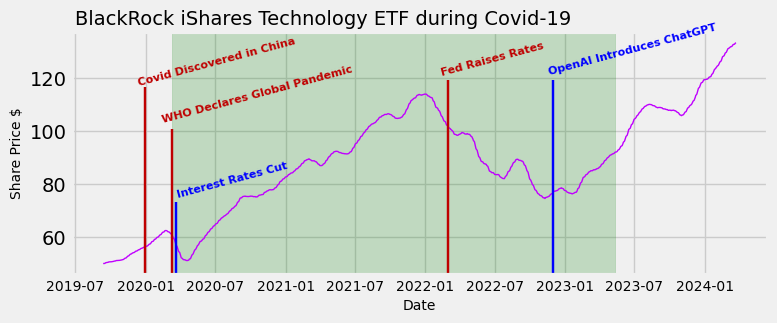

In [13]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(iyw_covid['Date'], iyw_covid['Close'].rolling(30).mean(), linewidth=1, color='#bf00ff')
ax.set_ylabel('Share Price $',fontsize=10)
ax.set_xlabel('Date',fontsize=10)
ax.tick_params(axis='x',labelsize=10)
ax.text(pd.to_datetime('2019-07-01'),140,s="BlackRock iShares Technology ETF during Covid-19")
ax.axvspan(pd.to_datetime('2020-03-11'),pd.to_datetime('2023-05-11'), alpha=0.2, color='green')
ax.axvline(pd.to_datetime('2019-12-31'), color='#bf0000', linewidth=1.75, linestyle='-', ymax=0.77)
ax.text(pd.to_datetime('2019-12-08'), 117, s='Covid Discovered in China', size=8, rotation=15, color='#bf0000', weight='bold')
ax.axvline(pd.to_datetime('2020-03-11'), linewidth=1.75, linestyle='-', color='#bf0000', ymax=0.6)
ax.text(pd.to_datetime('2020-02-10'), 103, rotation=15, color='#bf0000', s='WHO Declares Global Pandemic', size=8, weight='bold')
ax.axvline(pd.to_datetime('2020-03-20'), color='blue', linewidth=1.75, linestyle='-', ymax=0.3)
ax.text(pd.to_datetime('2020-03-20'), 75, rotation=15, color='blue', s='Interest Rates Cut', size=8, weight='bold')
ax.axvline(pd.to_datetime('2022-03-01'), color='#bf0000', linewidth=1.75, linestyle='-', ymax=0.8)
ax.text(pd.to_datetime('2022-02-08'), 121, rotation=15, color='#bf0000', s='Fed Raises Rates', size=8, weight='bold')
ax.text(pd.to_datetime('2022-11-15'), 121, rotation=15, color='blue', s='OpenAI Introduces ChatGPT', size=8, weight='bold')
ax.axvline(pd.to_datetime('2022-11-30'), color='blue', linewidth=1.75, linestyle='-', ymax=0.8)

In [14]:
fig.savefig('/Users/reese/Downloads/iyw_covid.pdf')

# Calculating Average Annual Growth for Blackrock's ETF

In [15]:
#set the date column as the index
iyw.set_index('Date', inplace=True)

In [16]:
iyw

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-19,27.765625,27.765625,27.437500,27.437500,23.689451,80000
2000-05-22,26.500000,26.500000,26.500000,26.500000,22.880022,400
2000-05-23,27.312500,27.312500,27.000000,27.093750,23.392653,104000
2000-05-24,25.734375,26.812500,24.875000,26.812500,23.149824,96400
2000-05-25,27.593750,27.617188,26.437500,26.437500,22.826054,64800
...,...,...,...,...,...,...
2024-04-18,129.520004,130.070007,128.229996,128.410004,128.410004,1468800
2024-04-19,127.790001,128.190002,124.320000,124.750000,124.750000,2094300
2024-04-22,125.800003,127.070000,124.559998,126.239998,126.239998,1832600


In [17]:
#Resample to get annual close value
iyw_annual_close = iyw['Close'].resample('A').last()

In pandas, `Series.resample("A").last()` is a very powerful method-chain that is used to downsample a time series to a yearly frequency and then it returns the last observation of each year. Here's a breakdown of the code.

* `Series.resample("A")`: This part of the method is used for resampling time series data. The `"A"` parameter stands for 'annual' or 'year-end frequency'. It groups the data into 'one-year bins', with each bin corresponding to a calendar year. <br>
<br>
* `.last()`: This function is applied to each 'bin' created by the resample method and returns the final value of each year.

This method is very useful when you want to analyze or report year-end values from a time series dataset, such as stock prices or annual sales data.

In [18]:
print(iyw_annual_close)

Date
2000-12-31     18.640625
2001-12-31     13.300000
2002-12-31      8.125000
2003-12-31     12.127500
2004-12-31     12.115000
2005-12-31     12.430000
2006-12-31     13.612500
2007-12-31     15.615000
2008-12-31      8.832500
2009-12-31     14.385000
2010-12-31     16.094999
2011-12-31     15.975000
2012-12-31     17.680000
2013-12-31     22.110001
2014-12-31     26.100000
2015-12-31     26.757500
2016-12-31     30.062500
2017-12-31     40.692501
2018-12-31     39.982498
2019-12-31     58.150002
2020-12-31     85.080002
2021-12-31    114.820000
2022-12-31     74.489998
2023-12-31    122.750000
2024-12-31    128.929993
Freq: A-DEC, Name: Close, dtype: float64


Now let's put this resampled Series to use.

In [19]:
#using pct_change, we calculate the year-end change in closing price as a percentage
iyw_annual_growth_rates = iyw_annual_close.pct_change().dropna()

In [20]:
iyw_annual_growth_rates

Date
2001-12-31   -0.286505
2002-12-31   -0.389098
2003-12-31    0.492615
2004-12-31   -0.001031
2005-12-31    0.026001
2006-12-31    0.095133
2007-12-31    0.147107
2008-12-31   -0.434358
2009-12-31    0.628644
2010-12-31    0.118874
2011-12-31   -0.007456
2012-12-31    0.106729
2013-12-31    0.250566
2014-12-31    0.180461
2015-12-31    0.025192
2016-12-31    0.123517
2017-12-31    0.353597
2018-12-31   -0.017448
2019-12-31    0.454386
2020-12-31    0.463113
2021-12-31    0.349553
2022-12-31   -0.351245
2023-12-31    0.647872
2024-12-31    0.050346
Freq: A-DEC, Name: Close, dtype: float64

In [21]:
iyw_average_annual_growth = iyw_annual_growth_rates.mean()

In [22]:
average_annual_growth_percentage = iyw_average_annual_growth * 100

In [23]:
print(average_annual_growth_percentage)

12.610692603895052


According to this data analysis, the average annual growth rate of **BlackRock's iShares Technology ETF (IYW)** is a **12.6% year-over-year increase** dating back to 2001. 

Given that the tech sector is poised to see even more exponential growth because of rapid AI advancements, it seems that diversified and savvy tech investors stand to experience tremendous growth over the coming years. However, that's only if tech continues booming and market sentiment remains strong.

# Calculating Risk for BlackRock's ETF

To calculate the risk for BlackRock's ETF, we'll want to refer to the standard deviation.

In [24]:
iyw_returns = iyw['Close'].pct_change()

In [25]:
iyw_risk = iyw_returns.std()

In [26]:
iyw_annualized_risk = iyw_risk * np.sqrt(252)
print(f"The annualized risk of BlackRock's IYW ETF is: {iyw_annualized_risk}")

The annualized risk of BlackRock's IYW ETF is: 0.27316699256448945


The annual risk value seems quite high. However, as the old sayings goes, the greater the risk, the greater the reward. With that in mind, it's important to assess your own risk tolerance. 

How much can you realistically afford to lose if the market turns downward?

Now, if you consider yourself a person with low risk tolerance, than the S&P 500 may be a better choice than a technology ETF. In the next part of this project, we'll graph the performance of the S&P 500 over it's lifetime, assess the average annual growth, and calculate annual risk for the S&P 500.

# S&P 500 Performance Analysis

The S&P 500 index, as we know it today, was introduced in 1957. However, its historical data can be traced back to 1927 because Standard & Poor’s had a stock index that preceded the S&P 500. This earlier index included a smaller number of stocks and was expanded over the years. When the S&P 500 was launched, it was back-calculated to 1927 to provide a continuous record of the U.S. stock market’s performance.

This back-calculation was done using historical stock prices and other financial data from that period. The process involved reconstructing the index as if it had existed in its current form since 1927, allowing for a consistent comparison of market performance over time. This is why platforms like Yahoo Finance can provide historical data for the S&P 500 (SPX) going back to 1927, despite the actual index starting in 1957.

In [27]:
spx = pd.read_csv("sp500.csv")

In [28]:
spx

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
24191,2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
24192,2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
24193,2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000
24194,2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000


Now that we've got the S&P 500 loaded into a dataframe, let's do some exploring and cleaning.

In [29]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24196 entries, 0 to 24195
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       24196 non-null  object 
 1   Open       24196 non-null  float64
 2   High       24196 non-null  float64
 3   Low        24196 non-null  float64
 4   Close      24196 non-null  float64
 5   Adj Close  24196 non-null  float64
 6   Volume     24196 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB


We'll want to convert the date column into datetime, since datetime is more compatible with pandas and matplotlib.

In [30]:
spx['Date'] = pd.to_datetime(spx['Date'])

In [31]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24196 entries, 0 to 24195
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       24196 non-null  datetime64[ns]
 1   Open       24196 non-null  float64       
 2   High       24196 non-null  float64       
 3   Low        24196 non-null  float64       
 4   Close      24196 non-null  float64       
 5   Adj Close  24196 non-null  float64       
 6   Volume     24196 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.3 MB


Next, we'll use the Series.value_counts() function to return the frequencies of all the unique values in our datasets. This is useful for finding non-integer values that may throw off our calculations.

In [32]:
sp_columns = spx.columns

In [33]:
for c in sp_columns:
    print(spx[c].value_counts())

Date
1927-12-30    1
1992-04-13    1
1992-04-27    1
1992-04-24    1
1992-04-23    1
             ..
1960-03-23    1
1960-03-22    1
1960-03-21    1
1960-03-18    1
2024-04-26    1
Name: count, Length: 24196, dtype: int64
Open
0.000000       5075
14.700000        14
14.940000        13
11.670000        13
11.920000        13
               ... 
429.980011        1
429.929993        1
432.059998        1
435.309998        1
5084.649902       1
Name: count, Length: 13564, dtype: int64
High
14.700000      14
14.940000      13
11.670000      13
11.920000      13
12.080000      12
               ..
280.890015      1
282.309998      1
289.109985      1
290.779999      1
5114.620117     1
Name: count, Length: 16677, dtype: int64
Low
14.700000      14
11.670000      13
14.940000      13
11.920000      13
10.790000      12
               ..
246.339996      1
249.679993      1
237.639999      1
239.000000      1
5073.140137     1
Name: count, Length: 16675, dtype: int64
Close
14.700000      14
1

Besides the date column, there doesn't appear to be any non-integer values in any of the other columns. We can move onto creating our first visualization. Let's try and reuse some code from earlier visualizations.

Let's focus on how the S&P 500 performed during COVID-19.

In [34]:
spx_covid = spx[spx['Date'].between(pd.to_datetime('2019-08-01'),pd.to_datetime('2024-03-24'))]

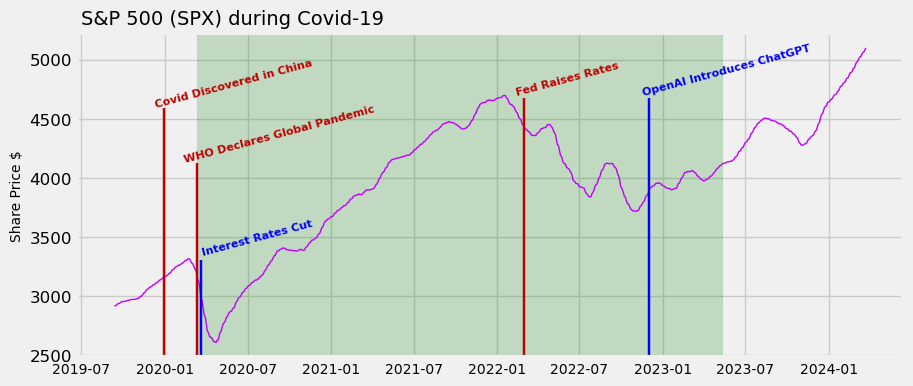

In [35]:
fig, ax = plt.subplots(figsize=(9.5,4))
ax.plot(spx_covid['Date'], spx_covid['Close'].rolling(30).mean(), linewidth=1, color='#bf00ff')
ax.set_ylabel('Share Price $',fontsize=10)
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=12)
ax.text(pd.to_datetime('2019-07-01'),5300,s="S&P 500 (SPX) during Covid-19")
ax.axvspan(pd.to_datetime('2020-03-11'),pd.to_datetime('2023-05-11'), alpha=0.2, color='green')
ax.axvline(pd.to_datetime('2019-12-31'), color='#bf0000', linewidth=1.75, linestyle='-', ymax=0.77)
ax.text(pd.to_datetime('2019-12-08'), 4600, s='Covid Discovered in China', size=8, rotation=15, color='#bf0000', weight='bold')
ax.axvline(pd.to_datetime('2020-03-11'), linewidth=1.75, linestyle='-', color='#bf0000', ymax=0.6)
ax.text(pd.to_datetime('2020-02-10'), 4133, rotation=15, color='#bf0000', s='WHO Declares Global Pandemic', size=8, weight='bold')
ax.axvline(pd.to_datetime('2020-03-20'), color='blue', linewidth=1.75, linestyle='-', ymax=0.3)
ax.text(pd.to_datetime('2020-03-20'), 3350, rotation=15, color='blue', s='Interest Rates Cut', size=8, weight='bold')
ax.axvline(pd.to_datetime('2022-03-01'), color='#bf0000', linewidth=1.75, linestyle='-', ymax=0.8)
ax.text(pd.to_datetime('2022-02-08'), 4700, rotation=15, color='#bf0000', s='Fed Raises Rates', size=8, weight='bold')
ax.text(pd.to_datetime('2022-11-15'), 4700, rotation=15, color='blue', s='OpenAI Introduces ChatGPT', size=8, weight='bold')
ax.axvline(pd.to_datetime('2022-11-30'), color='blue', linewidth=1.75, linestyle='-', ymax=0.8)

fig.savefig('/Users/reese/Downloads/spx_covid.pdf')

# Calculating the Average Annual Growth of the S&P 500

Next, we'll calculate the average annual growth of the S&P 500.

In [36]:
spx.set_index('Date',inplace=True)

In [37]:
spx

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000


In [38]:
spx_annual_close = spx['Close'].resample('A').last()
#this will show the SPX closing price on the last day of each year
spx_annual_close

Date
1927-12-31      17.660000
1928-12-31      24.350000
1929-12-31      21.450001
1930-12-31      15.340000
1931-12-31       8.120000
                 ...     
2020-12-31    3756.070068
2021-12-31    4766.180176
2022-12-31    3839.500000
2023-12-31    4769.830078
2024-12-31    5106.540039
Freq: A-DEC, Name: Close, Length: 98, dtype: float64

In [39]:
#this will find the growth rate for each year
spx_annual_growth_rates = spx_annual_close.pct_change().dropna()

In [40]:
spx_annual_growth_rates

Date
1928-12-31    0.378822
1929-12-31   -0.119096
1930-12-31   -0.284849
1931-12-31   -0.470665
1932-12-31   -0.147783
                ...   
2020-12-31    0.162589
2021-12-31    0.268927
2022-12-31   -0.194428
2023-12-31    0.242305
2024-12-31    0.070592
Freq: A-DEC, Name: Close, Length: 97, dtype: float64

In [41]:
print(f"The average yearly growth rate for the S&P 500 is {round(spx_annual_growth_rates.mean() * 100,2)}%")

The average yearly growth rate for the S&P 500 is 7.84%


Dating back to 1928, the average growth of the S&P 500 is 7.8%, which is very strong, considering over 12 recessions have happened since 1928.

Now that we have the average annual growth rate of Blackrock's Technology ETF and the S&P 500, let's compare how an investment of $100,000 would grow over five years.

# Calculating the Risk of Investing in the S&P 500 (SPX)

Just like the last time, we'll refer to the standard deviation to calulcate the risk of the S&P 500. 

We'll use the `Close` column for our calculations.

In [42]:
spx = spx.reset_index()

spx_slice = spx[spx['Date'].between(pd.to_datetime('2000-05-19'),pd.to_datetime('2024-04-24'))]

spx_returns = spx_slice['Close'].pct_change()

spx_risk = spx_returns.std() * np.sqrt(252)

print(f"The annualized risk of the S&P 500 is: {spx_risk}")

The annualized risk of the S&P 500 is: 0.19414534621109442


# Investment Comparison

In [43]:
spx_investment = 100000
growth_rate = 0.078
years = 5

final_amount = spx_investment * ((1 + growth_rate) ** years)

print(f"After 5 years of average growth, $100,000 will grow to ${final_amount:.2f} if invested in the S&P 500")

After 5 years of average growth, $100,000 will grow to $145577.35 if invested in the S&P 500


In [44]:
iyw_investment = 100000
growth_rate = 0.128
years = 5

final_amount = iyw_investment * ((1 + growth_rate) ** years)

print(f"After 5 years of average growth, $100,000 will grow to ${final_amount:.2f} if invested in Blackrock's Technology ETF. ")

After 5 years of average growth, $100,000 will grow to $182618.81 if invested in Blackrock's Technology ETF. 


# Final Visualization


For the final visualization, we're going to overlay the S&P 500 (SPX) with BlackRock Inc's iShares Technology ETF (IYW). This will allow us to compare how both indices perform during the highs and lows of the stock market. However, since the IYW only goes back to May 19, 2000, we'll go ahead and take a snippet from the SPX that mirrors this length of time.

In [45]:
spx = spx[spx['Date'].between(pd.to_datetime('2000-05-19'),pd.to_datetime('2024-04-24'))]
spx

,Date,Open,High,Low,Close,Adj Close,Volume
18174,2000-05-19,1437.209961,1437.209961,1401.739990,1406.949951,1406.949951,853700000
18175,2000-05-22,1406.949951,1410.550049,1368.729980,1400.719971,1400.719971,869000000
18176,2000-05-23,1400.719971,1403.770020,1373.430054,1373.859985,1373.859985,869900000
18177,2000-05-24,1373.859985,1401.750000,1361.089966,1399.050049,1399.050049,1152300000
18178,2000-05-25,1399.050049,1411.650024,1373.930054,1381.520020,1381.520020,984500000
...,...,...,...,...,...,...,...
24189,2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
24190,2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000
24191,2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000
24192,2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000


In [46]:
iyw = iyw.reset_index()
iyw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-05-19,27.765625,27.765625,27.437500,27.437500,23.689451,80000
1,2000-05-22,26.500000,26.500000,26.500000,26.500000,22.880022,400
2,2000-05-23,27.312500,27.312500,27.000000,27.093750,23.392653,104000
3,2000-05-24,25.734375,26.812500,24.875000,26.812500,23.149824,96400
4,2000-05-25,27.593750,27.617188,26.437500,26.437500,22.826054,64800
...,...,...,...,...,...,...,...
6015,2024-04-18,129.520004,130.070007,128.229996,128.410004,128.410004,1468800
6016,2024-04-19,127.790001,128.190002,124.320000,124.750000,124.750000,2094300
6017,2024-04-22,125.800003,127.070000,124.559998,126.239998,126.239998,1832600
6018,2024-04-23,127.080002,128.820007,126.849998,128.520004,128.520004,1326900


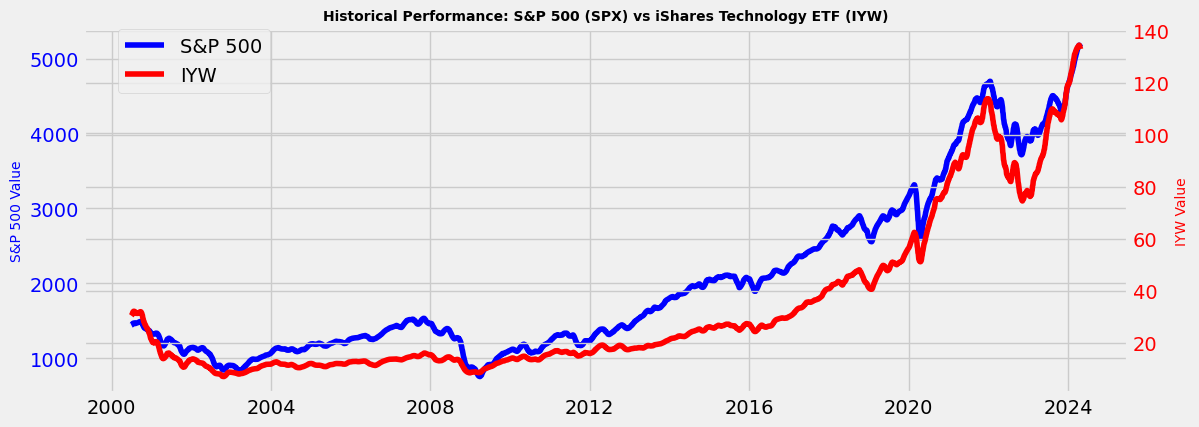

In [47]:
fig, ax1 = plt.subplots(figsize=(12,4.5))

#plot the first dataset with a line plot
ax1.plot(spx['Date'],spx['Close'].rolling(30).mean(),label='S&P 500',color='blue')
ax1.set_ylabel('S&P 500 Value',color='blue',size=10)
ax1.tick_params(axis='y',labelcolor='blue')

#create a secondary y axis for the IYW data
ax2 = ax1.twinx()
ax2.plot(iyw['Date'],iyw['Close'].rolling(30).mean(), label='IYW', color='red')
ax2.set_ylabel('IYW Value', color='red',size=10)
ax2.tick_params(axis='y', labelcolor='red')

#add title and legend
ax1.set_title('Historical Performance: S&P 500 (SPX) vs iShares Technology ETF (IYW)',size=10,weight='bold')
fig.legend(loc='upper left',bbox_to_anchor=(0.1,0.9))

fig.savefig('/Users/reese/Downloads/iyw_vs_spx.pdf')

# Observations

By overlaying the plots of the S&P 500 and the iShares Technology ETF (IYW) on the same axes, we can compare their historical performance over the same time interval. This visual comparison allows us to see how each investment has trended relative to the other during the same period of time.

Keep in mind that while the plots are overlaid, the actual values are based on their respective y-axes. 

The primary y-axis corresponds to the S&P 500 values, and the secondary y-axis corresponds to the IYW values. This setup helps in comparing the relative performance trends without the scales of the two datasets interfering with each other.

Since we have matched the date ranges for both datasets, this overlay will provide a meaningful comparison of the historical performance of the two investments. It’s a powerful way to visually analyze the data and make informed decisions based on the trends you observe. 

# Investor Conclusion

If you're just getting started with investing, index funds are a great way to experience long-term growth. For even greater growth, technology index funds are very powerful investment vehicles.

A good strategy for someone just getting started in their career is to invest money into an S&P index or a technology index such as BlackRock's iShares Tech ETF, and once the portfolio is strong enough, take the money out and buy a house. 

Once you no longer have to pay rent, start investing whatever you can comfortably afford back into index funds as a way to further diversify your investment portfolio. 